In [2]:
"""
Universidade Federal do Rio de Janeiro
Professor Heraldo Almeida
Aluno Felipe Augusto de Miranda Villela

Este documento jupyter foi desenvolvido para fins avaliativos da disciplina Introdução ao aprendizado de máquina. Nele iremos
escrever um algoritmo que irá prever os preços de diamantes baseados em suas características dadas pelo conjunto de dados.
"""

'\nUniversidade Federal do Rio de Janeiro\nProfessor Heraldo Almeida\nAluno Felipe Augusto de Miranda Villela\n\nEste documento jupyter foi desenvolvido para fins avaliativos da disciplina Introdução ao aprendizado de máquina. Nele iremos\nescrever um algoritmo que irá prever os preços de diamantes baseados em suas características dadas pelo conjunto de dados.\n'

In [3]:
"""
Inicialmente, vamos importar as bibliotecas a serem usadas. Aqui estamos utilizando pandas para manipular os 
conjuntos de dados; sci-kit learn para aplicar os algoritmos de machine learning; matplotlib para gerar gráficos
e numpy para fazer alguns cálculos nos dataframes.
"""

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt  
import matplotlib as mpl  
import numpy as np

In [4]:
"""Primeiramente, iremos importar os conjuntos de treino e teste e analisar suas variáveis"""

train = pd.read_csv('train.csv',delimiter=',',encoding='latin-1')
test = pd.read_csv('test.csv', delimiter=',', encoding='latin-1')

train

,id,carat,cut,color,clarity,x,y,z,depth,table,price
0,20000,0.35,Very Good,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
1,20001,0.70,Ideal,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
2,20002,0.32,Ideal,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
3,20003,0.30,Ideal,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
4,20004,0.33,Premium,I,VVS2,4.41,4.47,2.76,62.2,59.0,579
5,20005,0.51,Premium,G,VS2,5.17,5.12,3.15,61.2,60.0,1546
6,20006,0.43,Ideal,J,IF,4.84,4.87,3.03,62.4,56.0,890
7,20007,1.06,Ideal,H,SI2,6.65,6.63,3.99,60.1,59.0,4401
8,20008,1.01,Premium,F,VS2,6.47,6.43,3.98,61.7,58.0,7240
9,20009,0.33,Ideal,E,VVS2,4.44,4.48,2.73,61.2,56.0,814


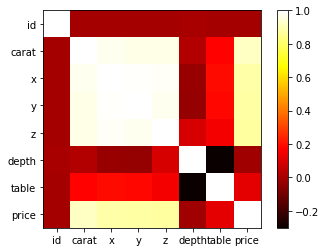

In [5]:
"""Afim de procurar correlações entre as variáveis, vamos analisar uma matriz de correlação"""

corr = train.corr()  
plt.imshow(corr, cmap='hot', interpolation='none')  
plt.colorbar()  
plt.xticks(range(len(corr)), corr.columns)  
plt.yticks(range(len(corr)), corr.columns);  
plt.show()

In [6]:
"""Com base na célula acima, vemos que existe uma forte correlção das colunas x, y, z e carat, tornando-as redundantes
Por isso, iremos deixar apenas a coluna carat. Também iremos excluir a coluna id para que essa não influencie
na hora de aplicar a função para gerar a random forest. Faremos o mesmo com o dataset de teste para que não ocorra 
discrepância nas dimensões"""

train = train.drop(columns=['x','y','z', 'id'])
test = test.drop(columns=['x','y','z', 'id'])

train

,carat,cut,color,clarity,depth,table,price
0,0.35,Very Good,G,VVS2,62.8,58.0,798
1,0.70,Ideal,F,SI1,62.6,56.0,2089
2,0.32,Ideal,F,VVS1,61.4,56.0,990
3,0.30,Ideal,H,VVS2,61.7,54.2,631
4,0.33,Premium,I,VVS2,62.2,59.0,579
5,0.51,Premium,G,VS2,61.2,60.0,1546
6,0.43,Ideal,J,IF,62.4,56.0,890
7,1.06,Ideal,H,SI2,60.1,59.0,4401
8,1.01,Premium,F,VS2,61.7,58.0,7240
9,0.33,Ideal,E,VVS2,61.2,56.0,814


In [7]:
"""aqui estamos transformando as colunas que são categóricas em variáveis binárias"""
train = pd.get_dummies(train,columns=['cut'])
train = pd.get_dummies(train,columns=['color'])
train = pd.get_dummies(train,columns=['clarity'])

test = pd.get_dummies(test,columns=['cut'])
test = pd.get_dummies(test,columns=['color'])
test = pd.get_dummies(test,columns=['clarity'])

train

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.35,62.8,58.0,798,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.70,62.6,56.0,2089,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.32,61.4,56.0,990,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.30,61.7,54.2,631,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.33,62.2,59.0,579,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0.51,61.2,60.0,1546,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.43,62.4,56.0,890,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7,1.06,60.1,59.0,4401,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1.01,61.7,58.0,7240,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.33,61.2,56.0,814,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
"""Nesta céula, estamos dividindo o dataset em duas partes para aplicar o algoritmo de regressão
afim de ajustar o modelo e ter um parâmetro do RMSPE"""

percent80 = train['price'].size*0.8
percent80 = int(percent80)

y80 = train[0:percent80+1]

y20 = train[percent80:]

In [9]:
"""Aqui estamos fazendo o teste com nosso dataset de treino, aplicando a ele diversos valores para o parâmetro
n_estimators do algoritmo Random Forest"""

for i in range(20,220,20):
    regres = RandomForestRegressor(n_estimators=i).fit(y80.drop(columns=['price']), y80['price'])
    
    y20_pred = regres.predict(y20.drop(columns=['price']))

    
    loss = np.sqrt(np.mean(np.square(((y20['price'] - y20_pred) / y20['price'])), axis=0))
    
    print("número de arvores: " + str(i) + " RMSPE: " + str(loss))

número de arvores: 20 RMSPE: 0.11658776265832747
número de arvores: 40 RMSPE: 0.11497632283629074
número de arvores: 60 RMSPE: 0.11465851310598195
número de arvores: 80 RMSPE: 0.11450432336102391
número de arvores: 100 RMSPE: 0.11418631094607119
número de arvores: 120 RMSPE: 0.11438461085051582
número de arvores: 140 RMSPE: 0.11417053065135079
número de arvores: 160 RMSPE: 0.11383256344257688
número de arvores: 180 RMSPE: 0.11393852660406203
número de arvores: 200 RMSPE: 0.11385186604747037


In [10]:
"""Aqui estamos testando o algoritmo de support vector machine"""

from sklearn import svm


regres = svm.SVR(gamma='scale').fit(y80.drop(columns=['price']), y80['price'])
    
y20_pred = regres.predict(y20.drop(columns=['price']))

loss = np.sqrt(np.mean(np.square(((y20['price'] - y20_pred) / y20['price'])), axis=0))

print(" RMSPE: " + str(loss))

 RMSPE: 1.515425940337253


In [11]:
"""Aqui estamos testando o algoritmo KNN"""

from sklearn.neighbors import KNeighborsRegressor

for i in range(1,20,1):
    regres = KNeighborsRegressor(n_neighbors=5).fit(y80.drop(columns=['price']), y80['price'])

    y20_pred = regres.predict(y20.drop(columns=['price']))

    loss = np.sqrt(np.mean(np.square(((y20['price'] - y20_pred) / y20['price'])), axis=0))

    print(" RMSPE: " + str(loss))

 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524
 RMSPE: 0.9830113667217524


In [12]:
"""Aqui estamos pegando os dados já tratados e separando a variável alvo das demais para
passar como parâmetro para a função que irá gerar a random forest. No teste feito acima, o algoritmo que teve melhor
desempenho foi o random forest com n_estimators=120"""

train_x = train.drop(columns=['price'])
train_y = train['price']


regres = RandomForestRegressor(n_estimators=120).fit(train_x, train_y)

pred_y = regres.predict(test) #Nesta linha, estamos aplicando a função para fazer a predição do conjunto teste

pred_y

array([13947.91666667,  5062.80833333,  2398.83958333, ...,
        1309.28731481,  2132.22541667,   840.20388889])

In [13]:
"""Por fim, estamos gerando o csv que será submetido à plataforma Kaggle"""

pred = pd.DataFrame(pred_y, columns=['price'])


#pred.to_csv('sampleSubmission.csv')

pred


,price
0,13947.916667
1,5062.808333
2,2398.839583
3,5506.366667
4,2348.769444
5,952.472778
6,980.417718
7,11892.136111
8,11710.802778
9,1089.350000
